<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab3/blob/main/6351071071_LAB3_Bai6(Trang26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Hữu Toàn – 6351071071


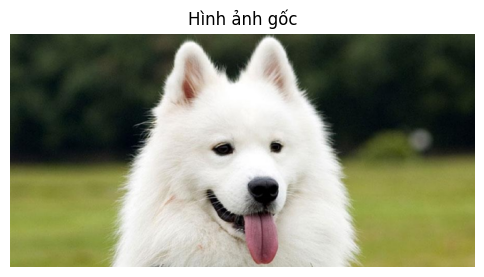

Shape dữ liệu flatten: (213204, 3)


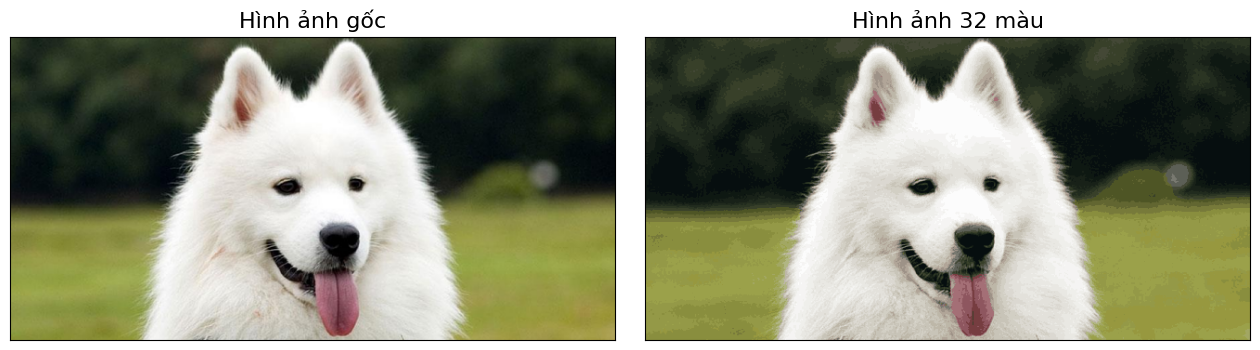

Đã lưu hình ảnh 32 màu: compressed_img2.png


In [2]:
print("Nguyễn Hữu Toàn – 6351071071")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

# --- Đọc ảnh ---
image = Image.open('dog.png')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(image)
plt.title("Hình ảnh gốc")
plt.show()

# --- Chuyển ảnh thành mảng ---
imarr = np.array(image)

# Nếu ảnh grayscale, chuyển sang RGB 3 kênh
if len(imarr.shape) == 2:  # 1 kênh
    imarr = np.stack([imarr]*3, axis=-1)
elif imarr.shape[2] == 4:  # 4 kênh RGBA
    imarr = imarr[:, :, :3]  # loại bỏ alpha

rows, cols = imarr.shape[0], imarr.shape[1]

# --- Chuẩn hóa màu và flatten ---
data = imarr / 255.0
data = data.reshape(rows * cols, 3)
print("Shape dữ liệu flatten:", data.shape)

# --- K-Means gom cụm 32 màu ---
kmeans = KMeans(n_clusters=32, max_iter=300, random_state=42)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
img_recolored = new_colors.reshape(imarr.shape)

# --- Hiển thị kết quả ---
fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Hình ảnh gốc', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('Hình ảnh 32 màu', size=16)
plt.show()

# --- Lưu hình ---
img_recolored_uint8 = (img_recolored * 255).astype(np.uint8)
new_img = Image.fromarray(img_recolored_uint8)
new_img.save('compressed_img2.png')
print("Đã lưu hình ảnh 32 màu: compressed_img2.png")